# Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv("boston_housing.csv")

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

## Linear Regression
The last column MEDV is the dependent variable (to predict) and the rest are all independent variables.
For linear regression we assume that there is a linear relationship between the dependent (y) and independent variables (x).

The equation is:
y = c0 + m1x1 + m2x2 + ...

In [19]:
# independent variables
x = df.drop("medv", axis=1)
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [20]:
# dependent variable
y = df["medv"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=8)

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
print(y_pred)

[19.28883573 10.85988867 38.59129649 26.96991386 41.19616623 27.5020147
 10.15089519 36.36204315 29.11390675 35.10675959 13.1770154   7.42260522
 15.47800002 24.30373696 16.13206338 29.04199933 23.09708622 22.42294948
 20.71129086  6.94172637 20.85885629 25.31322531 30.4371245  33.34697763
 28.54469984 35.50284857  4.87316127 14.48210287 25.60545045 23.42122846
 34.5713243  18.50689315 19.54799338 22.87251366 25.55797955 27.17338154
 32.32378911 25.72457408 14.30127104 14.0407134  21.5880176  21.97210249
 36.13731131 35.09941159 23.2883895  19.4669714  19.96839606 21.16773009
 25.46521569 24.28277704 19.96572436 16.54803815 31.93391009 16.32313667
 22.43572724 24.57315108 20.78783846  4.98724547 20.02803952 28.45569097
 24.28890163 21.86478452 20.05289185  9.03398187 14.42635844 17.38763606
 12.78219408 20.2673821  35.25976033 35.89091858 13.81470741 28.89720337
 30.59577806 31.8910685  22.01426224 28.52451573 29.37580939 17.11514508
 13.7245613  18.37135413 13.89518036  5.70222767 16.

### Visualisations

Text(0.5, 1.0, 'Regression Plot')

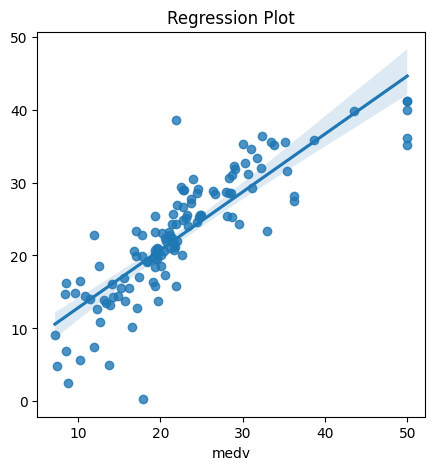

In [37]:
plt.figure(figsize=(5,5))
sns.regplot(x = y_test, y = y_pred)
plt.title("Regression Plot")

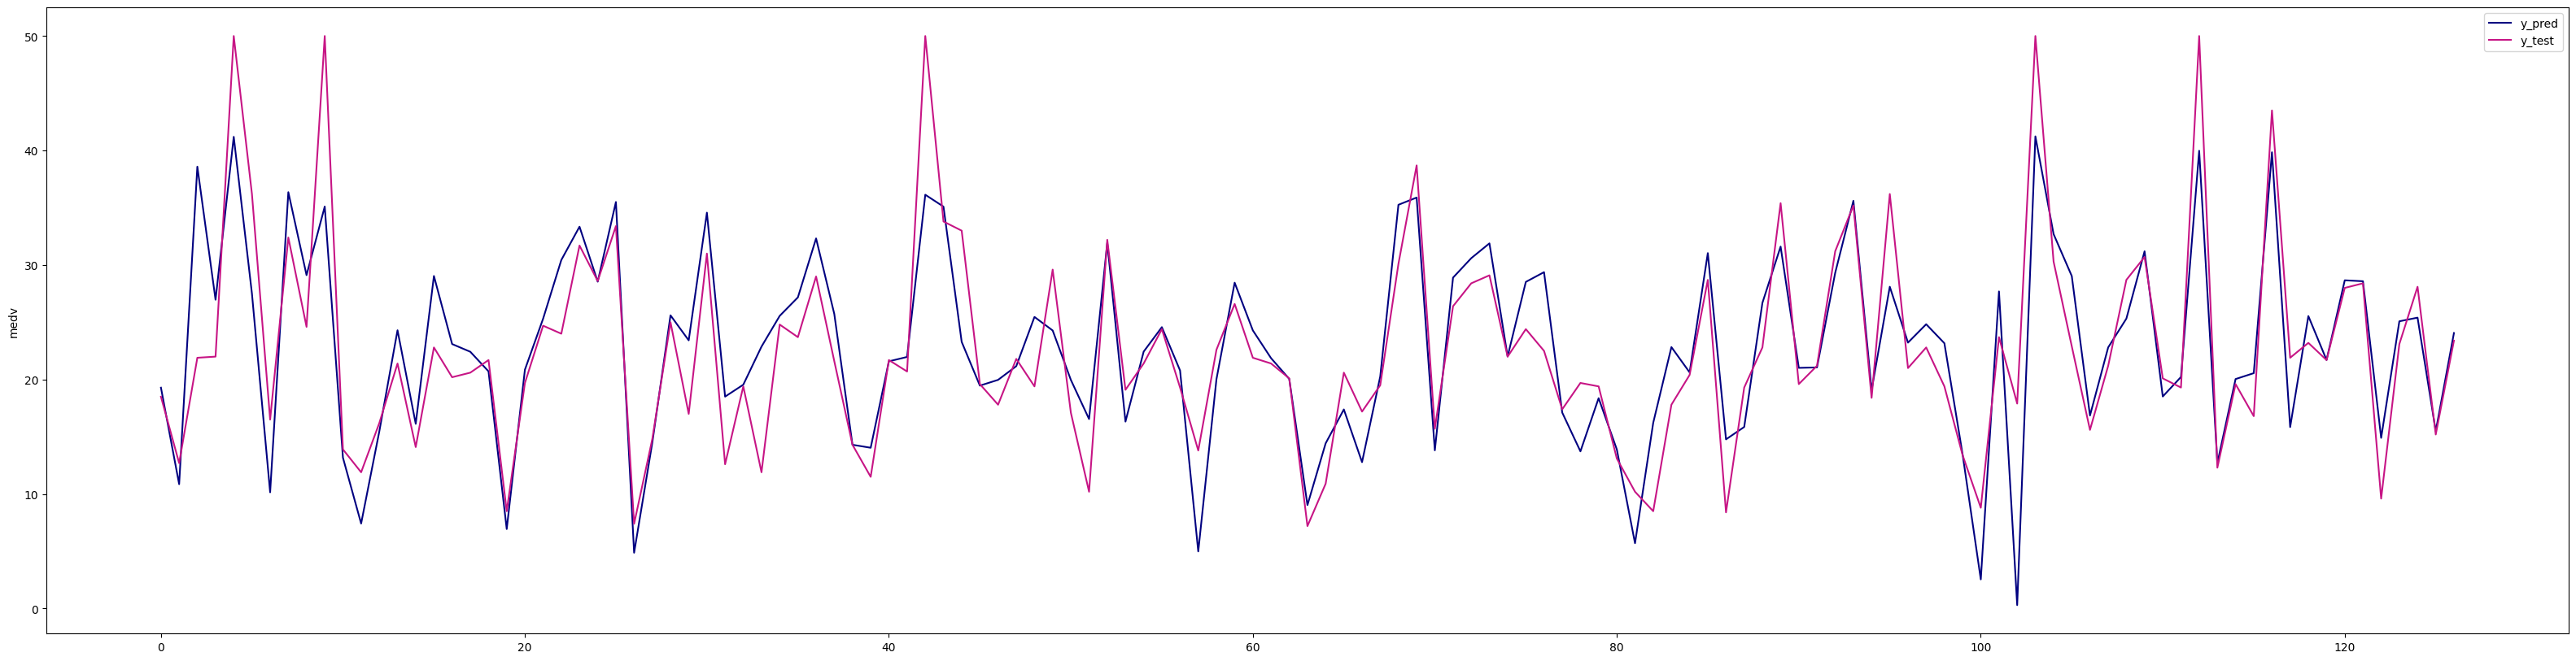

In [34]:
plt.figure(figsize = (40, 10))
sns.lineplot(x=range(len(y_pred)), y=y_pred, color='navy', label='y_pred')
sns.lineplot(x=range(len(y_test)), y=y_test, color='mediumvioletred', label='y_test')
plt.legend()
plt.show()

### Performance Metrics 

In [38]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 4.762797963174827
R2: 0.7190053348356756
